In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv(r'C:\Users\Kerry\Dataset_Malawi_National_Football_Team_Matches.csv')
print(data.head())
data.shape

         Date           Opponent  Team Score  Opponent Score Result    Venue  \
0       ~1957  Northern Rhodesia         0.0             5.0   Loss  Unknown   
1       ~1962              Ghana         0.0            12.0   Loss  Unknown   
2       ~1968           Botswana         8.0             1.0    Win  Unknown   
3  02/06/1996       South Africa         0.0             3.0   Loss     Away   
4  07/07/1996             Zambia         1.0             1.0   Draw     Home   

                      Competition  
0  Friendly (First International)  
1                        Friendly  
2                        Friendly  
3             World Cup Qualifier  
4                        Friendly  


(73, 7)

In [2]:
data.isnull().sum()

Date              0
Opponent          0
Team Score        1
Opponent Score    1
Result            0
Venue             0
Competition       0
dtype: int64

In [3]:
data.duplicated().sum()

0

In [4]:
data.describe()

,Team Score,Opponent Score
count,72.000000,72.000000
mean,0.833333,1.569444
std,1.342690,1.758892
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,1.000000,2.000000
max,8.000000,12.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            73 non-null     object 
 1   Opponent        73 non-null     object 
 2   Team Score      72 non-null     float64
 3   Opponent Score  72 non-null     float64
 4   Result          73 non-null     object 
 5   Venue           73 non-null     object 
 6   Competition     73 non-null     object 
dtypes: float64(2), object(5)
memory usage: 4.1+ KB


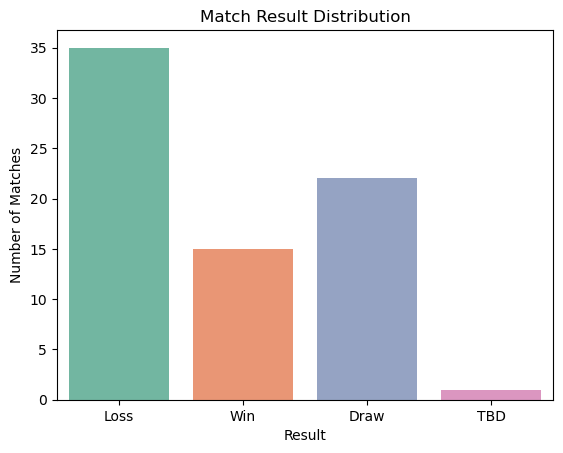

In [6]:
sns.countplot(x='Result', hue='Result', data=data, palette='Set2', legend=False)
plt.title('Match Result Distribution')
plt.xlabel('Result')
plt.ylabel('Number of Matches')
plt.show()

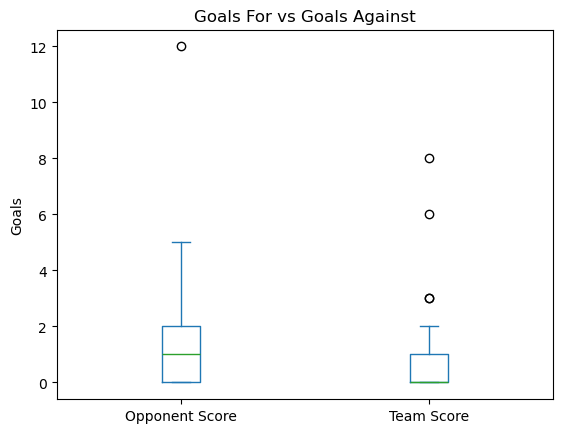

In [7]:
# Step 6: Goals For vs Goals Against (Boxplot)
data[['Opponent Score', 'Team Score']].plot(kind='box')
plt.title('Goals For vs Goals Against')
plt.ylabel('Goals')
plt.show()

C:\Users\Kerry\AppData\Local\Temp\ipykernel_2180\2750136101.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=win_rate.values, y=win_rate.index, palette='Greens')


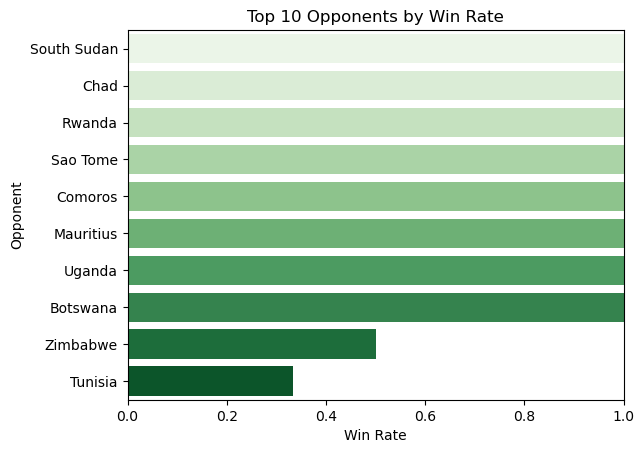

In [10]:
win_data = data[data['Result'] == 'Win'].groupby('Opponent').size()
total_data = data.groupby('Opponent').size()
win_rate = (win_data / total_data).fillna(0).sort_values(ascending=False).head(10)
sns.barplot(x=win_rate.values, y=win_rate.index, palette='Greens')
plt.title('Top 10 Opponents by Win Rate')
plt.xlabel('Win Rate')
plt.ylabel('Opponent')
plt.xlim(0, 1)
plt.show()